In [10]:
import numpy as np
import matplotlib.pyplot as plt
xTime = np.array([1/1000 * i for i in range(500)])
xData = 20*np.sin(2*np.pi*30*xTime)
# Add white noise with amplitude 0.1
noise_amplitude = 0.1
noise = noise_amplitude * np.random.normal(0, 1, len(xData))
xData_with_noise = xData + noise

yData = 9.28 * xData_with_noise


In [11]:
from filterpy.kalman import KalmanFilter
noise_us = noise_amplitude * np.random.normal(0, 1, len(xData))
dt = 1/1000   # time step 1 second

noise_2sd = noise_amplitude * dt
#zPred = np.asarray(zPred).reshape(-1)
zRef = yData
Kscale = 9.2843
# Plot the predicted and reference curves
#timeRange = np.array([1/1000 * i for i in range(len(BInput))])
timeRange = xTime
Q1 = 0
Q2 = 9.2845*1e-5

## dynamic noise
Qdynamic = 0.1**2/dt**3
inputNoise = np.random.randn(len(timeRange)) * np.sqrt(Qdynamic)


#Q2 = 11.2845*1e-5

GRpsn = 6.3246*1e-3
#GRpsn = 0.0286

tracker = KalmanFilter(dim_x=4, dim_z=1, dim_u=1)


tracker.F = np.array([[1, dt,0,0],[0,1,dt,0],[0,0,1,0],[9.2846*1e-2, 0,0,0]])

from scipy.linalg import block_diag
from filterpy.common import Q_discrete_white_noise

#q = Q_discrete_white_noise(dim=2, dt=dt, var=0.01)
tracker.Q = np.array([[0, 0,0,0],[0, 0,0,0],[0, 0,Qdynamic,0],[0, 0,0,Q2**2]])
print(tracker.Q)
#tracker.B = np.array([[0],[0],[0],[0]])

tracker.H = np.array([[0, 0,0, 1e2]])

tracker.R = np.array([[GRpsn**2]])

tracker.x = np.array([[0],[0],[0],[0]])
tracker.P = np.eye(4) * 1.
#tracker.P = 1
mu, cov, _, _ = tracker.batch_filter(yData)

mu0 = mu[:,0,:].reshape(-1)
mu_2sd = mu[:,2,:].reshape(-1)
mu1 = mu[:,3,:].reshape(-1)
KF_estimate_In = mu0 
KF_estimate_Measure = mu1 * 1e2

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.00000000e+07 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 8.62019402e-09]]


C:\Users\leisir\AppData\Local\Temp\ipykernel_14832\671263202.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-bright')


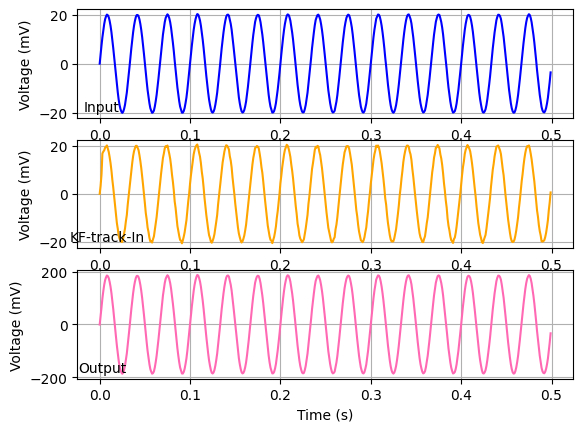

In [12]:
plt.style.use('seaborn-bright')

plt.subplot(3, 1, 1)
plt.plot(timeRange, xData_with_noise, color='blue')
plt.ylabel('Voltage (mV)')
plt.grid(True)
plt.text(0.05, 0.1, 'Input', transform=plt.gca().transAxes, ha='center', va='center')

plt.subplot(3, 1, 2)
plt.plot(timeRange, KF_estimate_In, color='orange')
plt.ylabel('Voltage (mV)')
plt.grid(True)
plt.text(0.06, 0.1, 'KF-track-In', transform=plt.gca().transAxes, ha='center', va='center')

plt.subplot(3, 1, 3)
plt.plot(timeRange, KF_estimate_Measure, color='#FF69B4')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (mV)')
plt.grid(True)
plt.text(0.05, 0.1, 'Output', transform=plt.gca().transAxes, ha='center', va='center')

plt.savefig('KF_Tri_30Hz.png', dpi=300, bbox_inches='tight')


Text(0.5, 1.0, 'KF on the zRef curve')

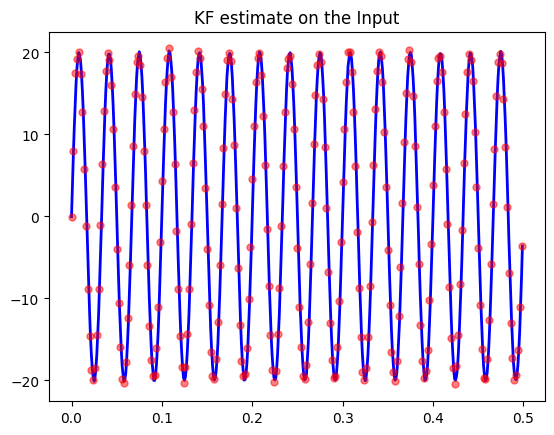

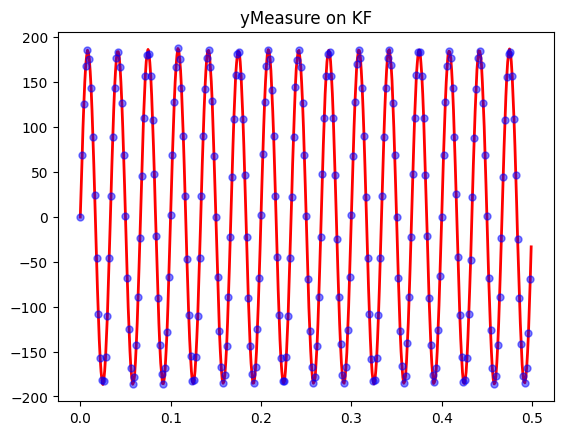

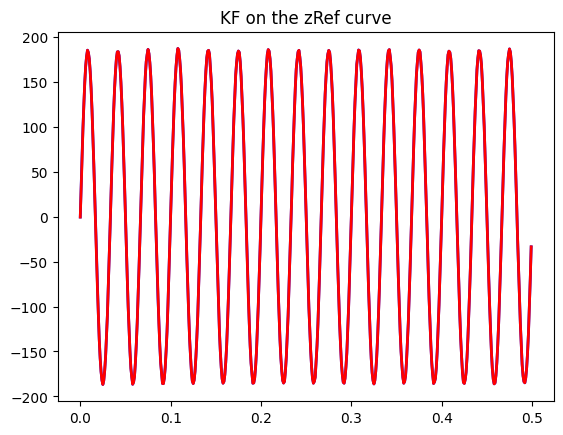

In [13]:
# plt.figure()
# plt.plot(timeRange, BInput, linestyle='-', linewidth=2, label='Ref', color='blue')
# plt.plot(timeRange[::2], KF_estimate_In[::2], 'o', markersize=5, linestyle='', label='Pred', alpha=0.5,color='red')
# plt.title('KF estimate on the Input curve')

plt.figure()
plt.plot(timeRange, xData_with_noise, linestyle='-', linewidth=2, label='Ref', color='blue')
plt.plot(timeRange[::2], KF_estimate_In[::2], 'o', markersize=5, linestyle='', label='Pred', alpha=0.5,color='red')
plt.title('KF estimate on the Input')


# plt.figure()
# plt.plot(timeRange, zRef, linestyle='-', linewidth=2, label='Ref', color='blue')
# plt.plot(timeRange[::2], yData[::2], 'o', markersize=5, linestyle='', label='Pred', alpha=0.5,color='red')
# plt.title('yMeasure Future on the zRef curve')

plt.figure()
plt.plot(timeRange, KF_estimate_Measure, linestyle='-', linewidth=2, label='Ref', color='red')
plt.plot(timeRange[::2], yData[::2], 'o', markersize=5, linestyle='', label='Pred', alpha=0.5,color='blue')
plt.title('yMeasure on KF')


plt.figure()
plt.plot(timeRange, zRef, linestyle='-', linewidth=2, label='Ref', color='blue')
#plt.plot(timeRange[::2], KF_estimate_Measure[::2], '0', markersize=5, linestyle='', label='Pred', alpha=0.5,color='red')
plt.plot(timeRange, KF_estimate_Measure, linestyle='-', linewidth=2, label='KF', color='red')

plt.title('KF on the zRef curve')
